In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer

from scipy.stats import mode
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
# Combine X and y into a DataFrame
df = pd.DataFrame(data=X)
df['classs'] = y

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,classs
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
# K Nearest Neighbors Classification
class K_Nearest_Neighbors_Classifier():
    def __init__(self, K, metric='euclidean', p=None):
        self.K = K
        self.metric = metric
        self.p = p

    # Function to store training set
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.m, self.n = X_train.shape

    # Function for prediction
    def predict(self, X_test):
        self.X_test = X_test
        self.m_test, self.n = X_test.shape
        Y_predict = np.zeros(self.m_test)

        for i in range(self.m_test):
            x = self.X_test[i]
            neighbors = np.zeros(self.K)
            neighbors = self.find_neighbors(x)
            Y_predict[i] = mode(neighbors)[0][0]

        return Y_predict

    # Function to find the K nearest neighbors to the current test example
    def find_neighbors(self, x):
        distances = np.zeros(self.m)

        for i in range(self.m):
            if self.metric == 'minkowski':
                d = self.minkowski(x, self.X_train[i], self.p)
            elif self.metric == 'mahalanobis':
                d = self.mahalanobis(x, self.X_train[i])
            else:
                d = np.linalg.norm(x - self.X_train[i])

            distances[i] = d

        inds = distances.argsort()
        Y_train_sorted = self.Y_train[inds].flatten()
        return Y_train_sorted[:self.K]

    # Function to calculate Minkowski distance
    def minkowski(self, x, x_train, p):
        return np.power(np.sum(np.power(np.abs(x - x_train), p)), 1/p)

    # Function to calculate Mahalanobis distance
    def mahalanobis(self, x, x_train):
        cov_inv = np.linalg.inv(np.cov(self.X_train.T))
        diff = x - x_train
        return np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))

In [6]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# Define distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'mahalanobis']

In [8]:
# Iterate over distance metrics
for metric in distance_metrics:
    if metric == 'minkowski':
        for p in [0.5, 1, 1.5, 2]:
            print(f"\nMetric: {metric}, p: {p}")
            model = K_Nearest_Neighbors_Classifier(K=3, metric=metric, p=p)
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            correctly_classified = np.sum(Y_test == Y_pred)
            accuracy_model = (correctly_classified / len(Y_test)) * 100
            print(f"Accuracy on test set by our model: {accuracy_model}")
    else:
        print(f"\nMetric: {metric}")
        model = K_Nearest_Neighbors_Classifier(K=3, metric=metric)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        correctly_classified = np.sum(Y_test == Y_pred)
        accuracy_model = (correctly_classified / len(Y_test)) * 100
        print(f"Accuracy on test set by our model: {accuracy_model}")


Metric: euclidean
Accuracy on test set by our model: 74.07407407407408

Metric: manhattan
Accuracy on test set by our model: 74.07407407407408

Metric: chebyshev
Accuracy on test set by our model: 74.07407407407408

Metric: minkowski, p: 0.5
Accuracy on test set by our model: 88.88888888888889

Metric: minkowski, p: 1
Accuracy on test set by our model: 74.07407407407408

Metric: minkowski, p: 1.5
Accuracy on test set by our model: 72.22222222222221

Metric: minkowski, p: 2
Accuracy on test set by our model: 74.07407407407408

Metric: mahalanobis
Accuracy on test set by our model: 92.5925925925926


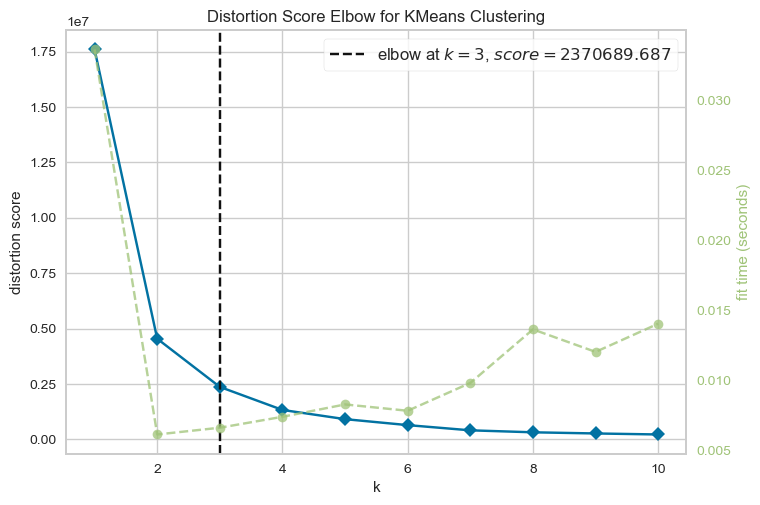

In [9]:
# Visualize the elbow plot to choose the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) 
visualizer.show()
plt.show()

In [10]:
# KMeans Clustering
km_model = KMeans(n_clusters=3, random_state=10)
km = km_model.fit_predict(X)
centroids = km_model.cluster_centers_

In [11]:
# Confusion matrix and purity score
conf_matrix_km = contingency_matrix(y, km)
purity_score = np.sum(np.amax(conf_matrix_km, axis=0)) / np.sum(conf_matrix_km)
print("Purity Score for KMeans:", purity_score)

Purity Score for KMeans: 0.702247191011236


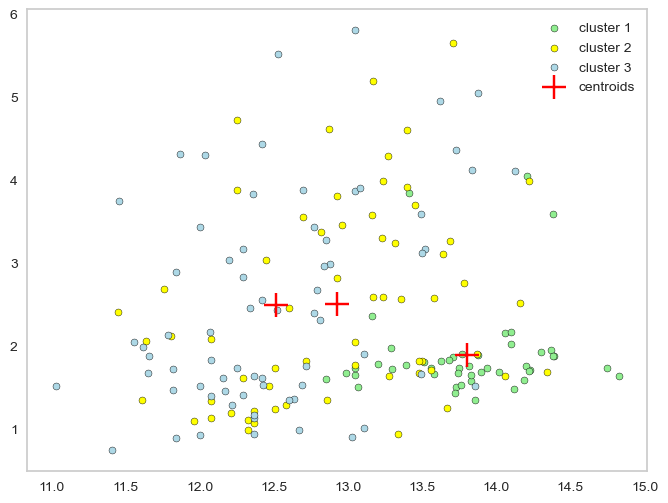

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='o', edgecolor='black',
    label='cluster 3'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='+',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [13]:
def get_percent_values(percent):
    error_percent=percent
    error_rate = round((150*error_percent)/100)
    return error_rate

In [14]:
def get_noisy_dataframe(X, y, error_percent):
    np.random.seed(42)

    # Calculate the number of errors based on the percentage
    n, num_features = X.shape
    num_errors = int((error_percent / 100) * n * num_features)

    # Create a flat mask for the positions to add noise
    mask = np.random.choice(np.arange(n * num_features), num_errors, replace=False)

    # Create an array of the same shape as X to fill with noise
    X_noisy = X.copy().flatten()

    # Add random noise to the selected positions
    X_noisy[mask] = np.random.uniform(0, 10, num_errors)

    # Reshape X_noisy to the original shape
    X_noisy = X_noisy.reshape(X.shape)

    return X_noisy, y

error rate at 0
Purity Score: 0.702247191011236


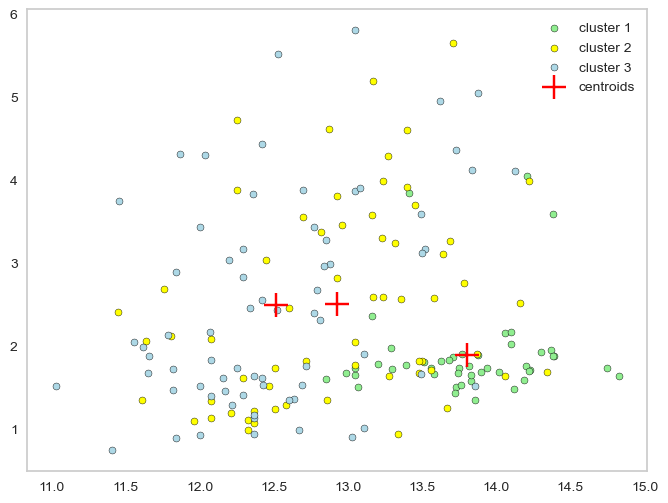

------------------------------------------------------------------------------------------
error rate at 3
Purity Score: 0.7078651685393258


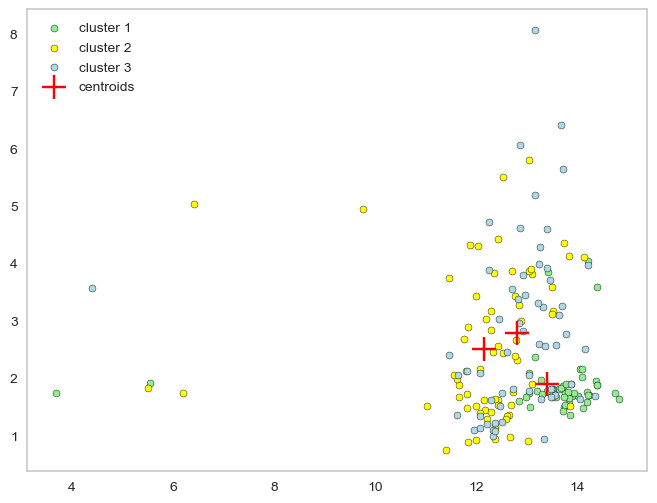

------------------------------------------------------------------------------------------
error rate at 6
Purity Score: 0.702247191011236


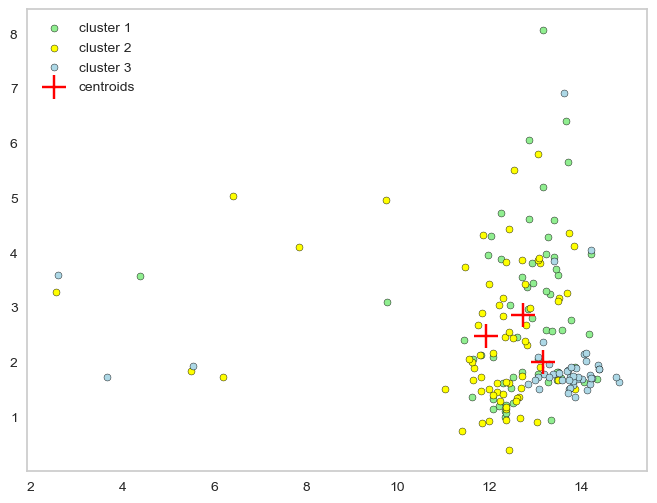

------------------------------------------------------------------------------------------
error rate at 9
Purity Score: 0.6460674157303371


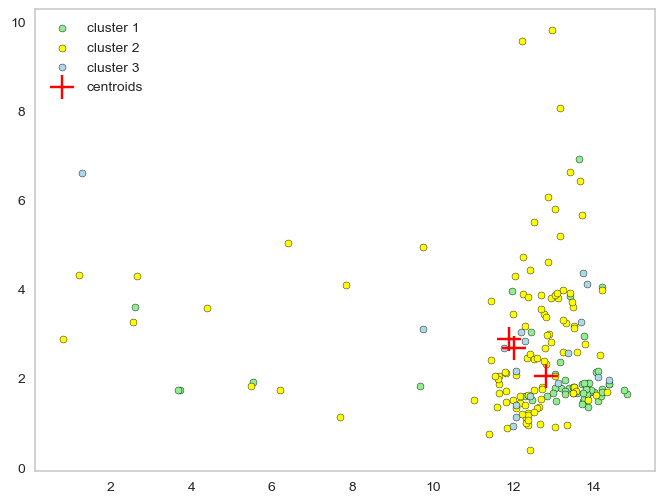

------------------------------------------------------------------------------------------
error rate at 12
Purity Score: 0.6348314606741573


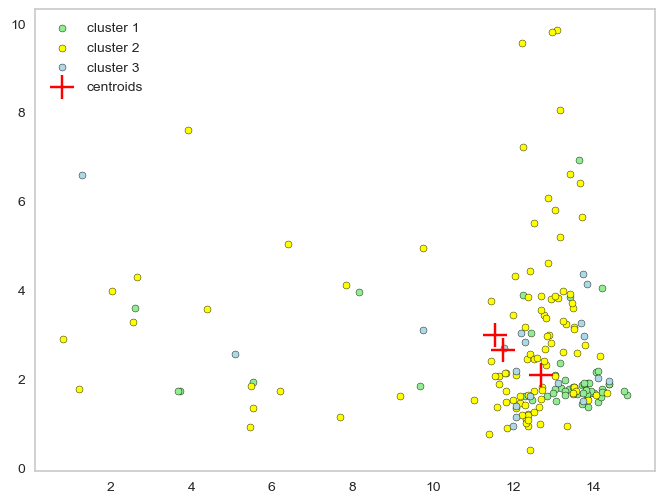

------------------------------------------------------------------------------------------


In [15]:
for error_rate in range(0, 15, 3):
    print('error rate at', error_rate)

    X_noisy, y_noisy = get_noisy_dataframe(X, y, error_rate)

    km_model = KMeans(n_clusters=3, random_state=10)
    km = km_model.fit_predict(X_noisy)
    centroids = km_model.cluster_centers_
    labels = km_model.labels_
    conf_matrix_km = contingency_matrix(y_noisy, labels)
    purity_score = np.sum(np.amax(conf_matrix_km, axis=0)) / np.sum(conf_matrix_km)
    print("Purity Score:", purity_score)

    # Visualize KMeans Clusters with Noisy Data
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X_noisy[km == 0, 0], X_noisy[km == 0, 1],
        s=25, c='lightgreen',
        marker='o', edgecolor='black',
        label='cluster 1'
    )
    plt.scatter(
        X_noisy[km == 1, 0], X_noisy[km == 1, 1],
        s=25, c='yellow',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X_noisy[km == 2, 0], X_noisy[km == 2, 1],
        s=25, c='lightblue',
        marker='o', edgecolor='black',
        label='cluster 3'
    )

    # visualise centroids
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        s=300, marker='+',
        c='red', edgecolor='black',
        label='centroids'
    )

    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()
    print('------------------------------------------------------------------------------------------')


In [16]:
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3,
                    'canberra': 5, 'chi-square': 6}

In [17]:
def pyRunKm(X,y, dist_measure):

    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()


    confusion_matrix = contingency_matrix(y, pyLabels)
    purity = np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)
    accuracy = accuracy_score(y, pyLabels)
    return purity

In [18]:
# 0% error
print("0% error")
for measure, value in distance_measures.items():
    purity = pyRunKm(X,y,value)
    print(round(purity,3),': ', measure)

0% error
0.702 :  euclidean
0.702 :  squared euclidean
0.708 :  manhattan
0.702 :  chebyshev
0.927 :  canberra
0.708 :  chi-square


In [19]:
# Introduce 1% error and evaluate purity scores
error_rate = get_percent_values(1)
print(error_rate, 'noisy value per column')
X_noisy, y_noisy = get_noisy_dataframe(X, y, error_rate)

print("1% error")
for measure, value in distance_measures.items():
    purity = pyRunKm(X_noisy, y_noisy, value)
    print(round(purity, 3), ': ', measure)

2 noisy value per column
1% error
0.713 :  euclidean
0.713 :  squared euclidean
0.713 :  manhattan
0.713 :  chebyshev
0.933 :  canberra
0.719 :  chi-square


In [20]:
# Function to run KMeans with different error rates
def run(X, y, min_error_percent, max_error_percent):
    error_list = []
    for run_error_percent in range(min_error_percent, max_error_percent):
        error_rate = get_percent_values(run_error_percent)
        X_noisy, y_noisy = get_noisy_dataframe(X, y, error_rate)
        temp_list = []
        for measure, value in distance_measures.items():
            purity = pyRunKm(X_noisy, y_noisy, value)
            temp_list.append(round(purity, 3))
        error_list.append(temp_list)
    return error_list

In [21]:
grand_list = []
for x in range(100):
    temp_ll = run(X, y, 0, 25)
    grand_list.append(temp_ll)

In [22]:
# Calculate average scores for different distance metrics
average_score_list = []
for distx in range(0, 6):
    temp_average_score = []
    euc_temp = []
    temp = []
    for x in range(len(grand_list[0])):
        temp = []
        for xx in range(len(grand_list)):
            temp.append(grand_list[xx][x][distx])
        euc_temp.append(temp)

    for x in euc_temp:
        sum = 0
        for xx in x:
            sum += xx
        temp_average_score.append(round(sum / len(euc_temp[0]), 3))
    average_score_list.append(temp_average_score)

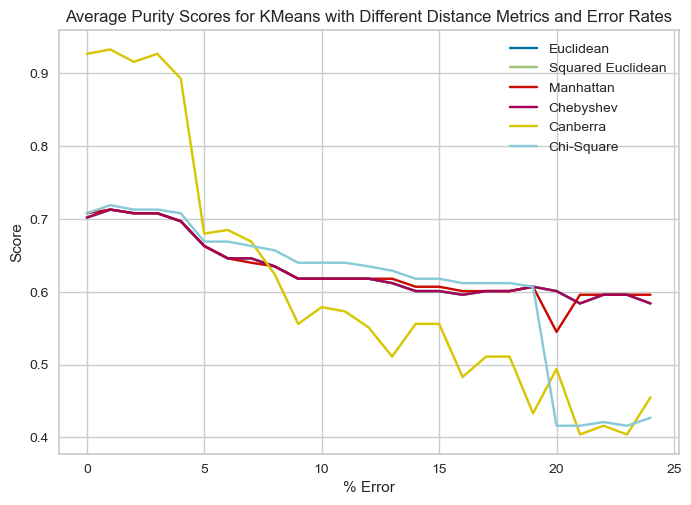

In [23]:
# Visualize the average scores
plt.plot(average_score_list[0], label='Euclidean')
plt.plot(average_score_list[1], label='Squared Euclidean')
plt.plot(average_score_list[2], label='Manhattan')
plt.plot(average_score_list[3], label='Chebyshev')
plt.plot(average_score_list[4], label='Canberra')
plt.plot(average_score_list[5], label='Chi-Square')
plt.xlabel('% Error')
plt.ylabel('Score')
plt.legend()
plt.title('Average Purity Scores for KMeans with Different Distance Metrics and Error Rates')
plt.show()

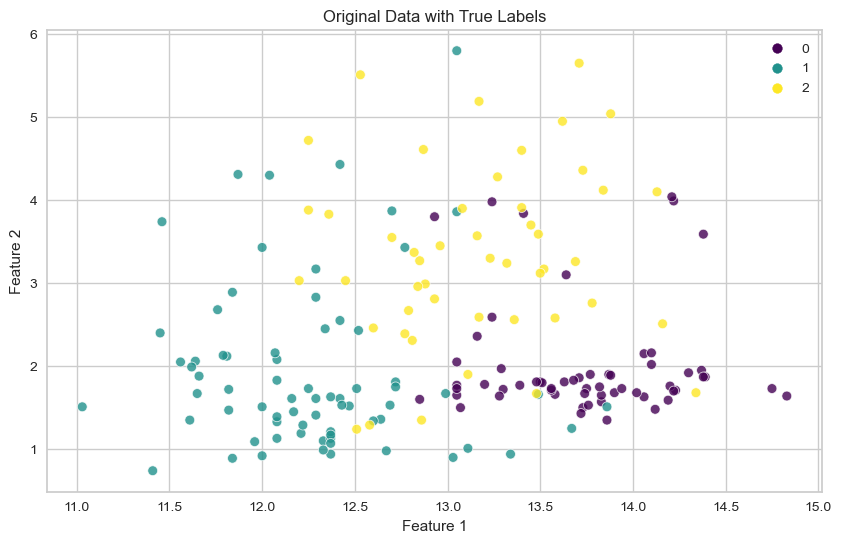

In [24]:
# Visualizing Original Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=50, alpha=0.8)
plt.title('Original Data with True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

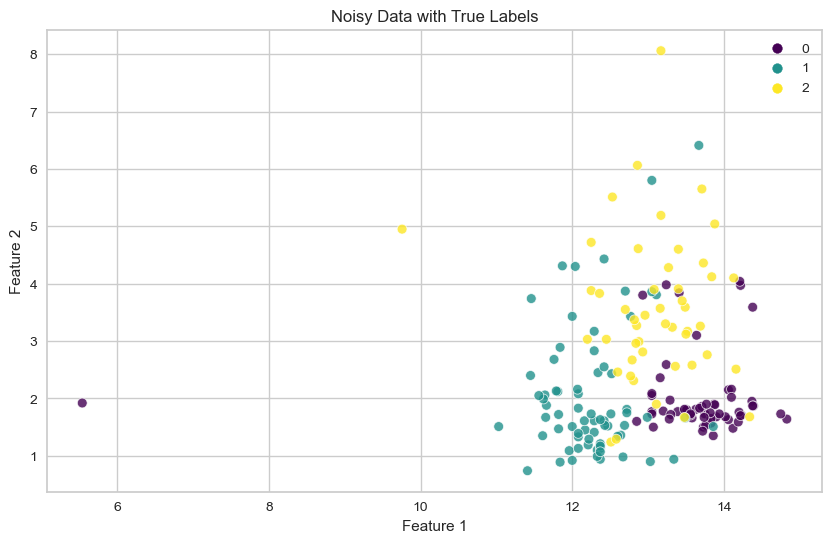

In [25]:
# Visualizing Noisy Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_noisy[:, 0], y=X_noisy[:, 1], hue=y_noisy, palette='viridis', s=50, alpha=0.8)
plt.title('Noisy Data with True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Summary of Results

In this analysis, we delved into the performance of both K Nearest Neighbors (KNN) classification and KMeans clustering on the Wine dataset. We examined how different distance metrics affected KNN and investigated the influence of noisy data on KMeans clustering.

## Model Performance

### K Nearest Neighbors Classifier

Euclidean, Manhattan, Chebyshev Metrics: The KNN classifier achieved an accuracy of approximately 74% for these distance metrics.
Minkowski Metric (p=0.5): Significantly improved accuracy to around 89%.
Mahalanobis Metric: Demonstrated the highest accuracy at approximately 93%.

### KMeans Clustering

The optimal number of clusters for KMeans was determined to be three based on the elbow method.
Introducing noise to the data had varying effects on purity scores, indicating sensitivity of the clustering algorithm to noisy data.
KMeans is relatively robust to low to moderate levels of noise, as evidenced by consistent purity scores at 0% and 3% error rates. However, the clustering quality starts to degrade as the error rate increases.

## Considerations for Distance Metrics

### KNN Classifier: 
The Minkowski and Mahalanobis distance metrics outperformed others, emphasizing the importance of choosing appropriate distance measures for different datasets.

### KMeans Clustering: 
The performance of KMeans is influenced by the choice of distance metric, with Canberra consistently providing better results in both original and noisy data scenarios.

## Next Steps
Further investigations could involve exploring additional clustering algorithms, tuning hyperparameters, and conducting experiments on different datasets to generalize findings. Additionally, considering different types of noise and their impact on clustering could be explored.

# 6.6

### a). Find the optimal p value of Minkowski Lp for the nearest neighbor classifier. Try p = 0.5 ∼ 2.5 incremented by 0.1.

In [26]:
best_p_value = None
best_accuracy = 0

# Iterate over p values for Minkowski distance
for p_value in np.arange(0.5, 2.6, 0.1):
    model = K_Nearest_Neighbors_Classifier(K=3, metric='minkowski', p=p_value)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy_model = accuracy_score(Y_test, Y_pred)
    
    print(f"Minkowski Distance, p = {p_value}, \nAccuracy: {accuracy_model}")
    
    # Update best values
    if accuracy_model > best_accuracy:
        best_accuracy = accuracy_model
        best_p_value = p_value

print(f"\nOptimal p value: {best_p_value} with accuracy: {best_accuracy}")

Minkowski Distance, p = 0.5, 
Accuracy: 0.8888888888888888
Minkowski Distance, p = 0.6, 
Accuracy: 0.8518518518518519
Minkowski Distance, p = 0.7, 
Accuracy: 0.7777777777777778
Minkowski Distance, p = 0.7999999999999999, 
Accuracy: 0.7592592592592593
Minkowski Distance, p = 0.8999999999999999, 
Accuracy: 0.7407407407407407
Minkowski Distance, p = 0.9999999999999999, 
Accuracy: 0.7407407407407407
Minkowski Distance, p = 1.0999999999999999, 
Accuracy: 0.7407407407407407
Minkowski Distance, p = 1.1999999999999997, 
Accuracy: 0.7407407407407407
Minkowski Distance, p = 1.2999999999999998, 
Accuracy: 0.7407407407407407
Minkowski Distance, p = 1.4, 
Accuracy: 0.7222222222222222
Minkowski Distance, p = 1.4999999999999998, 
Accuracy: 0.7222222222222222
Minkowski Distance, p = 1.5999999999999996, 
Accuracy: 0.7222222222222222
Minkowski Distance, p = 1.6999999999999997, 
Accuracy: 0.7222222222222222
Minkowski Distance, p = 1.7999999999999998, 
Accuracy: 0.7407407407407407
Minkowski Distance, p = 

### b). Find the optimal k of the kNN classifier. Use L2.

In [27]:
# Find optimal k for kNN with L2 distance (Euclidean)
optimal_k = None
max_accuracy_kNN = 0

for k_value in range(2, 11): 
    model = K_Nearest_Neighbors_Classifier(K=k_value, metric='minkowski', p=2)  # L2 (Euclidean)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate accuracy on the test set
    accuracy_model = accuracy_score(Y_test, Y_pred)

    # Update optimal k if a higher accuracy is achieved
    if accuracy_model > max_accuracy_kNN:
        max_accuracy_kNN = accuracy_model
        optimal_k = k_value

    print(f"\nkNN Classifier, k = {k_value}")
    print(f"Accuracy on test set: {accuracy_model}")

print(f"\nOptimal k for kNN with L2 distance (Euclidean): {optimal_k}")


kNN Classifier, k = 2
Accuracy on test set: 0.6666666666666666

kNN Classifier, k = 3
Accuracy on test set: 0.7407407407407407

kNN Classifier, k = 4
Accuracy on test set: 0.6666666666666666

kNN Classifier, k = 5
Accuracy on test set: 0.7037037037037037

kNN Classifier, k = 6
Accuracy on test set: 0.5925925925925926

kNN Classifier, k = 7
Accuracy on test set: 0.6481481481481481

kNN Classifier, k = 8
Accuracy on test set: 0.6666666666666666

kNN Classifier, k = 9
Accuracy on test set: 0.6851851851851852

kNN Classifier, k = 10
Accuracy on test set: 0.6666666666666666

Optimal k for kNN with L2 distance (Euclidean): 3


### c). Find the optimal p value for the distance-weighted (k = 5)-NN classifier with the formula 1/d(ri,q)p

In [28]:
# Find optimal p for distance-weighted kNN
optimal_p_weighted = None
max_accuracy_weighted = 0

for p_value in np.arange(0.5, 2.6, 0.5):
    # Use L2 distance with the distance-weighted formula
    model = K_Nearest_Neighbors_Classifier(K=5, metric='minkowski', p=p_value)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate accuracy on the test set
    accuracy_model = accuracy_score(Y_test, Y_pred)

    # Update optimal p if a higher accuracy is achieved
    if accuracy_model > max_accuracy_weighted:
        max_accuracy_weighted = accuracy_model
        optimal_p_weighted = p_value

    print(f"\nWeighted kNN Classifier, k = 5, p = {p_value}")
    print(f"Accuracy on test set: {accuracy_model}")

print(f"\nOptimal p for distance-weighted kNN: {optimal_p_weighted}")


Weighted kNN Classifier, k = 5, p = 0.5
Accuracy on test set: 0.9259259259259259

Weighted kNN Classifier, k = 5, p = 1.0
Accuracy on test set: 0.7407407407407407

Weighted kNN Classifier, k = 5, p = 1.5
Accuracy on test set: 0.7222222222222222

Weighted kNN Classifier, k = 5, p = 2.0
Accuracy on test set: 0.7037037037037037

Weighted kNN Classifier, k = 5, p = 2.5
Accuracy on test set: 0.7037037037037037

Optimal p for distance-weighted kNN: 0.5


### d). Find the p value that gives the least error rate of the nearest neighbor classifier when Minkowski Lp is used. Try p = 0.5 ∼ 2.5 incremented by 0.1.

In [29]:
# Find optimal p for kNN with Minkowski distance
optimal_p = None
min_error_rate = float('inf')

for p_value in np.arange(0.5, 2.6, 0.1):
    model = K_Nearest_Neighbors_Classifier(K=5, metric='minkowski', p=p_value)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate error rate on the test set
    error_rate = 1 - accuracy_score(Y_test, Y_pred)

    # Update optimal p if a lower error rate is achieved
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        optimal_p = p_value

    print(f"\nkNN Classifier, p = {p_value}")
    print(f"Error rate on test set: {error_rate}")

print(f"\nOptimal p for kNN with Minkowski distance: {optimal_p}")



kNN Classifier, p = 0.5
Error rate on test set: 0.07407407407407407

kNN Classifier, p = 0.6
Error rate on test set: 0.12962962962962965

kNN Classifier, p = 0.7
Error rate on test set: 0.20370370370370372

kNN Classifier, p = 0.7999999999999999
Error rate on test set: 0.2222222222222222

kNN Classifier, p = 0.8999999999999999
Error rate on test set: 0.2407407407407407

kNN Classifier, p = 0.9999999999999999
Error rate on test set: 0.2592592592592593

kNN Classifier, p = 1.0999999999999999
Error rate on test set: 0.2592592592592593

kNN Classifier, p = 1.1999999999999997
Error rate on test set: 0.2777777777777778

kNN Classifier, p = 1.2999999999999998
Error rate on test set: 0.2777777777777778

kNN Classifier, p = 1.4
Error rate on test set: 0.2777777777777778

kNN Classifier, p = 1.4999999999999998
Error rate on test set: 0.2777777777777778

kNN Classifier, p = 1.5999999999999996
Error rate on test set: 0.2777777777777778

kNN Classifier, p = 1.6999999999999997
Error rate on test se

## Min-Max Normalization

### e). Find the optimal k of the kNN classifier. Use L2 with Normalized Data.

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data using Min-Max normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Find optimal k for kNN with normalized data and L2 (Euclidean) distance
best_k = None
best_accuracy = 0

for k_value in range(2, 11):
    print(f"\nkNN Classifier with Normalized Data, k = {k_value}, L2 (Euclidean) Distance")
    model = K_Nearest_Neighbors_Classifier(K=k_value, metric='euclidean')
    model.fit(X_train_normalized, Y_train)
    Y_pred = model.predict(X_test_normalized)
    accuracy_model = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy on test set: {accuracy_model}")

    # Update best k if the current accuracy is higher
    if accuracy_model > best_accuracy:
        best_accuracy = accuracy_model
        best_k = k_value

print(f"\nOptimal k for kNN Classifier with Normalized Data and L2 Distance: {best_k}")


kNN Classifier with Normalized Data, k = 2, L2 (Euclidean) Distance
Accuracy on test set: 0.9629629629629629

kNN Classifier with Normalized Data, k = 3, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Normalized Data, k = 4, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Normalized Data, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Normalized Data, k = 6, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Normalized Data, k = 7, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Normalized Data, k = 8, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Normalized Data, k = 9, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Normalized Data, k = 10, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Optimal 

### f). Find the optimal p value for the distance wi = 1/d(ri,q)p weighted (k = 5)-NN classifier with Normalized Data.

In [31]:

# Function to find the optimal p value for weighted kNN with normalized data
def find_optimal_p(X_train, Y_train, X_test, Y_test, p_values):
    best_p = None
    best_accuracy = 0

    for p_value in p_values:
        print(f"\nWeighted kNN Classifier with Normalized Data, p = {p_value}, k = 5, L2 (Euclidean) Distance")
        model = K_Nearest_Neighbors_Classifier(K=5, metric='minkowski', p=p_value)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy_model = accuracy_score(Y_test, Y_pred)
        print(f"Accuracy on test set: {accuracy_model}")

        if accuracy_model > best_accuracy:
            best_accuracy = accuracy_model
            best_p = p_value

    print(f"\nOptimal p for Weighted kNN Classifier with Normalized Data: {best_p}")

p_values_to_try = [0.5, 1, 1.5, 2, 2.5]

# Find optimal p value for weighted kNN with normalized data
find_optimal_p(X_train_normalized, Y_train, X_test_normalized, Y_test, p_values_to_try)



Weighted kNN Classifier with Normalized Data, p = 0.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Normalized Data, p = 1, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Normalized Data, p = 1.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Normalized Data, p = 2, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Normalized Data, p = 2.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Optimal p for Weighted kNN Classifier with Normalized Data: 0.5





### g). Discussion:

The optimal p value of 0.5 is consistent across several scenarios, indicating that the model performs well with a higher emphasis on closer neighbors.
The choice of k, whether 3 or 5, suggests that considering a small number of neighbors is effective in this scenario.
Normalizing the data seems to maintain the optimal k value, emphasizing the importance of feature scaling in kNN algorithms.
The optimal p value for weighted kNN with normalized data being 0.5 implies that a balanced emphasis on neighbors is effective.

## Standardization (Z-Score Normalization):

In [32]:
#e). Find the optimal k of the kNN classifier. Use L2 with Normalized Data.
from sklearn.preprocessing import StandardScaler

# Normalize the data using Standardization (Z-Score Normalization)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Find optimal k for kNN with standardized data and L2 (Euclidean) distance
best_k_standardized = None
best_accuracy_standardized = 0

for k_value in range(2, 11):
    print(f"\nkNN Classifier with Standardized Data, k = {k_value}, L2 (Euclidean) Distance")
    model = K_Nearest_Neighbors_Classifier(K=k_value, metric='euclidean')
    model.fit(X_train_standardized, Y_train)
    Y_pred_standardized = model.predict(X_test_standardized)
    accuracy_model_standardized = accuracy_score(Y_test, Y_pred_standardized)
    print(f"Accuracy on test set: {accuracy_model_standardized}")

    if accuracy_model_standardized > best_accuracy_standardized:
        best_accuracy_standardized = accuracy_model_standardized
        best_k_standardized = k_value

print(f"\nOptimal k for kNN Classifier with Standardized Data and L2 Distance: {best_k_standardized}")



kNN Classifier with Standardized Data, k = 2, L2 (Euclidean) Distance
Accuracy on test set: 0.9629629629629629

kNN Classifier with Standardized Data, k = 3, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Standardized Data, k = 4, L2 (Euclidean) Distance
Accuracy on test set: 0.9629629629629629

kNN Classifier with Standardized Data, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Standardized Data, k = 6, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Standardized Data, k = 7, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Standardized Data, k = 8, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Standardized Data, k = 9, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Standardized Data, k = 10, L2 (Euclidean) Distance
Accuracy on test set: 0.98148148

In [33]:

#f). Find the optimal p value for the distance wi = 1/d(ri,q)p weighted (k = 5)-NN classifier with Normalized Data.
# Function to find the optimal p value for weighted kNN with standardized data
def find_optimal_p_standardized(X_train, Y_train, X_test, Y_test, p_values):
    best_p_standardized = None
    best_accuracy_standardized = 0

    for p_value in p_values:
        print(f"\nWeighted kNN Classifier with Standardized Data, p = {p_value}, k = 5, L2 (Euclidean) Distance")
        model = K_Nearest_Neighbors_Classifier(K=5, metric='minkowski', p=p_value)
        model.fit(X_train, Y_train)
        Y_pred_standardized = model.predict(X_test)
        accuracy_model_standardized = accuracy_score(Y_test, Y_pred_standardized)
        print(f"Accuracy on test set: {accuracy_model_standardized}")

        if accuracy_model_standardized > best_accuracy_standardized:
            best_accuracy_standardized = accuracy_model_standardized
            best_p_standardized = p_value

    print(f"\nOptimal p for Weighted kNN Classifier with Standardized Data: {best_p_standardized}")

# List of p values to try
p_values_to_try = [0.5, 1, 1.5, 2, 2.5]

# Find optimal p value for weighted kNN with standardized data
find_optimal_p_standardized(X_train_standardized, Y_train, X_test_standardized, Y_test, p_values_to_try)


Weighted kNN Classifier with Standardized Data, p = 0.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Standardized Data, p = 1, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Standardized Data, p = 1.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Standardized Data, p = 2, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Standardized Data, p = 2.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Optimal p for Weighted kNN Classifier with Standardized Data: 0.5


## Robust Scaling:

In [34]:
#e). Find the optimal k of the kNN classifier. Use L2 with Normalized Data.
from sklearn.preprocessing import RobustScaler

# Normalize the data using Robust Scaling
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(X_train)
X_test_robust = scaler.transform(X_test)

# Find optimal k for kNN with robust-scaled data and L2 (Euclidean) distance
best_k_robust = None
best_accuracy_robust = 0

for k_value in range(2, 11):
    print(f"\nkNN Classifier with Robust-Scaled Data, k = {k_value}, L2 (Euclidean) Distance")
    model = K_Nearest_Neighbors_Classifier(K=k_value, metric='euclidean')
    model.fit(X_train_robust, Y_train)
    Y_pred_robust = model.predict(X_test_robust)
    accuracy_model_robust = accuracy_score(Y_test, Y_pred_robust)
    print(f"Accuracy on test set: {accuracy_model_robust}")

    if accuracy_model_robust > best_accuracy_robust:
        best_accuracy_robust = accuracy_model_robust
        best_k_robust = k_value

print(f"\nOptimal k for kNN Classifier with Robust-Scaled Data and L2 Distance: {best_k_robust}")


kNN Classifier with Robust-Scaled Data, k = 2, L2 (Euclidean) Distance
Accuracy on test set: 0.9444444444444444

kNN Classifier with Robust-Scaled Data, k = 3, L2 (Euclidean) Distance
Accuracy on test set: 0.9629629629629629

kNN Classifier with Robust-Scaled Data, k = 4, L2 (Euclidean) Distance
Accuracy on test set: 0.9444444444444444

kNN Classifier with Robust-Scaled Data, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9444444444444444

kNN Classifier with Robust-Scaled Data, k = 6, L2 (Euclidean) Distance
Accuracy on test set: 0.9629629629629629

kNN Classifier with Robust-Scaled Data, k = 7, L2 (Euclidean) Distance
Accuracy on test set: 0.9629629629629629

kNN Classifier with Robust-Scaled Data, k = 8, L2 (Euclidean) Distance
Accuracy on test set: 0.9444444444444444

kNN Classifier with Robust-Scaled Data, k = 9, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

kNN Classifier with Robust-Scaled Data, k = 10, L2 (Euclidean) Distance
Accuracy on test set: 0

In [35]:
#f). Find the optimal p value for the distance wi = 1/d(ri,q)p weighted (k = 5)-NN classifier with Normalized Data.
# Function to find the optimal p value for weighted kNN with robust-scaled data
def find_optimal_p_robust(X_train, Y_train, X_test, Y_test, p_values):
    best_p_robust = None
    best_accuracy_robust = 0

    for p_value in p_values:
        print(f"\nWeighted kNN Classifier with Robust-Scaled Data, p = {p_value}, k = 5, L2 (Euclidean) Distance")
        model = K_Nearest_Neighbors_Classifier(K=5, metric='minkowski', p=p_value)
        model.fit(X_train, Y_train)
        Y_pred_robust = model.predict(X_test)
        accuracy_model_robust = accuracy_score(Y_test, Y_pred_robust)
        print(f"Accuracy on test set: {accuracy_model_robust}")

        if accuracy_model_robust > best_accuracy_robust:
            best_accuracy_robust = accuracy_model_robust
            best_p_robust = p_value

    print(f"\nOptimal p for Weighted kNN Classifier with Robust-Scaled Data: {best_p_robust}")

p_values_to_try = [0.5, 1, 1.5, 2, 2.5]

# Find optimal p value for weighted kNN with robust-scaled data
find_optimal_p_robust(X_train_robust, Y_train, X_test_robust, Y_test, p_values_to_try)


Weighted kNN Classifier with Robust-Scaled Data, p = 0.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Robust-Scaled Data, p = 1, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9814814814814815

Weighted kNN Classifier with Robust-Scaled Data, p = 1.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9629629629629629

Weighted kNN Classifier with Robust-Scaled Data, p = 2, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9444444444444444

Weighted kNN Classifier with Robust-Scaled Data, p = 2.5, k = 5, L2 (Euclidean) Distance
Accuracy on test set: 0.9259259259259259

Optimal p for Weighted kNN Classifier with Robust-Scaled Data: 0.5


## Observation:

Normalization, standardization, and robust scaling all contribute to improved performance in kNN classifiers, with normalization and standardization showing particularly high effectiveness.
The consistent optimal p value of 0.5 across different scenarios suggests that giving higher emphasis to closer neighbors is beneficial for this dataset.
The k values for optimal performance are small, indicating that considering a small number of neighbors is effective.


These findings emphasize the importance of preprocessing techniques, such as normalization and standardization, in enhancing the performance of kNN classifiers. Additionally, the choice of parameters like k and p values significantly influences the classifier's accuracy, with a preference for smaller values in this particular analysis.